# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('bankmarketing.csv')

# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:

# Check for missing values and data types
# Summary of data types and missing values
missing_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
})

print(missing_info)



               Data Type  Missing Values  Missing %
age                int64               0        0.0
job               object               0        0.0
marital           object               0        0.0
education         object               0        0.0
default           object               0        0.0
housing           object               0        0.0
loan              object               0        0.0
contact           object               0        0.0
month             object               0        0.0
day_of_week       object               0        0.0
duration           int64               0        0.0
campaign           int64               0        0.0
pdays              int64               0        0.0
previous           int64               0        0.0
poutcome          object               0        0.0
emp.var.rate     float64               0        0.0
cons.price.idx   float64               0        0.0
cons.conf.idx    float64               0        0.0
euribor3m   

In [8]:

# Summary statistics
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


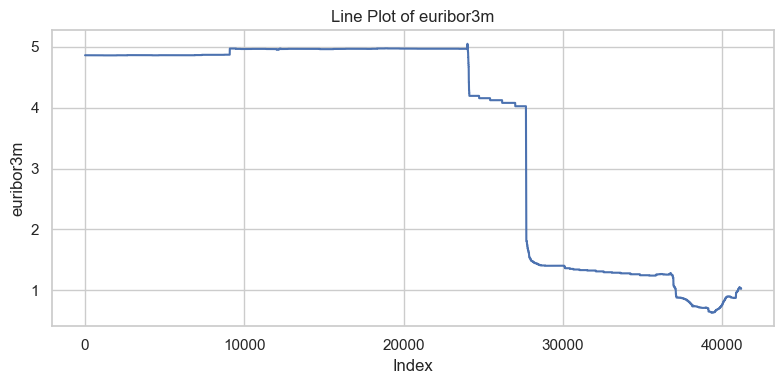

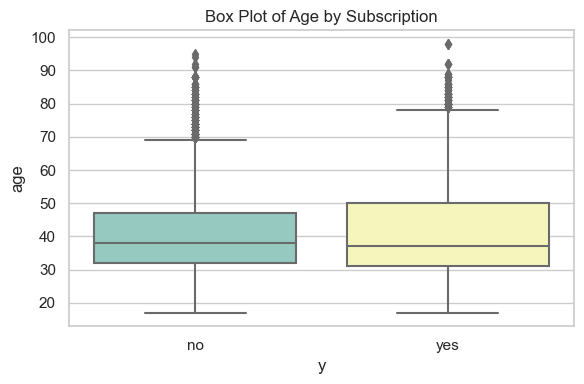

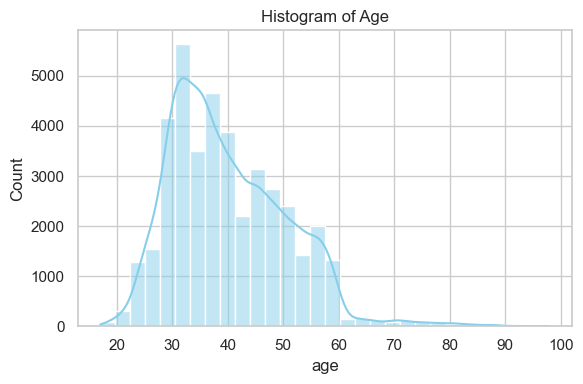

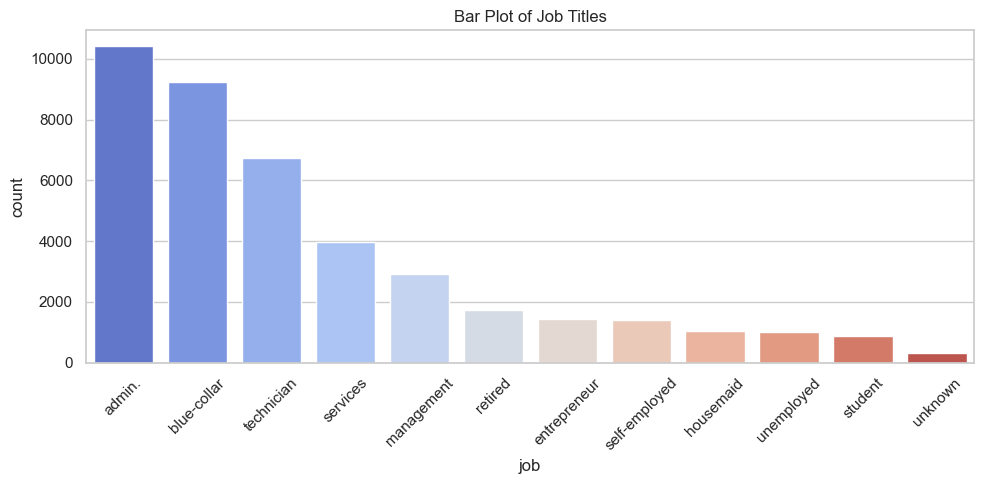

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


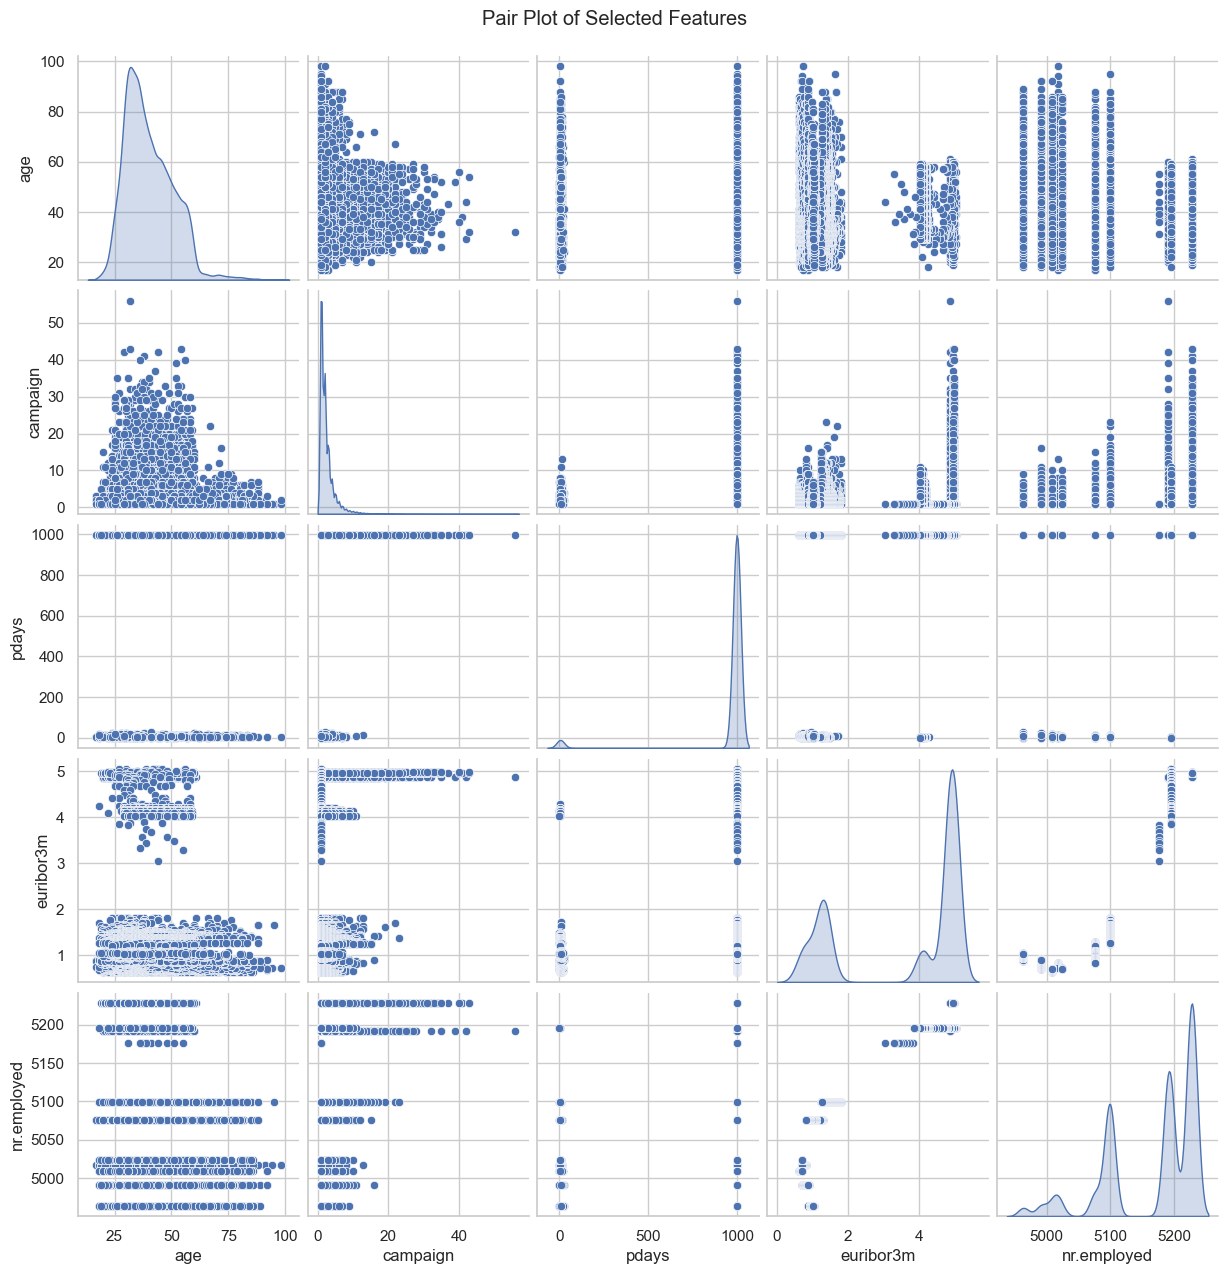

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable


# Set a consistent style
sns.set(style='whitegrid')

# 1. Line Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x=df.index, y='euribor3m')
plt.title('Line Plot of euribor3m')
plt.xlabel('Index')
plt.ylabel('euribor3m')
plt.tight_layout()
plt.show()

# 2. Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='y', y='age', palette='Set3')
plt.title('Box Plot of Age by Subscription')
plt.tight_layout()
plt.show()

# 3. Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.tight_layout()
plt.show()

# 4. Bar Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Bar Plot of Job Titles')
plt.tight_layout()
plt.show()

# 5. Pair Plot (on selected numerical columns to avoid overload)
selected_features = ['age', 'campaign', 'pdays', 'euribor3m', 'nr.employed']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


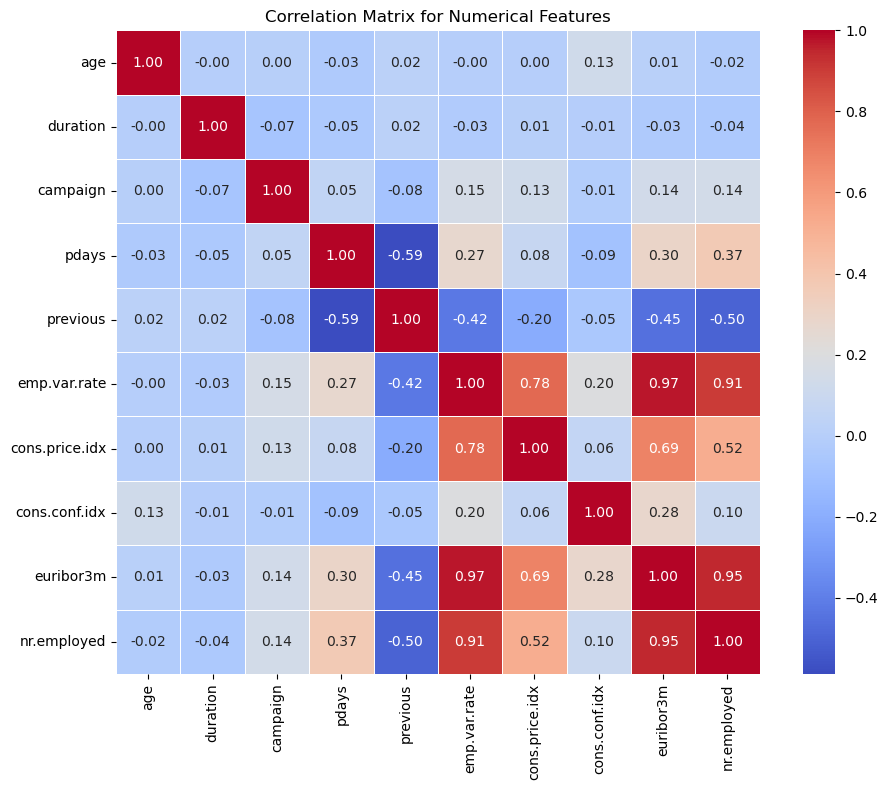

In [5]:

# Correlation matrix for numerical features

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()


## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
